# Polynomial regression 

The example belows uses a temperature-energy dataset in order to illustrate how to perform a non linear regression.

Workflow:
1. Preparation
    - Extract the dataset from the _power_demand_vs_temperature.csv_ 
    - Explore the dataset and check for missing values
    - Plot the distribution
    - Divide the dataset into train and test 
    - Create an evaluation function
2. First experiment
    - Create a linear model 
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
3. Second experiment
    - Create a polynomial regression model with degree 2
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
4. Third experiment
    - repeat the steps done in the second experiment but with degree 3
5. Third experiment
    - repeat the steps done in the second experiment but with degree 4
6. Compare the evaluation of each model


In [540]:
# Code source: Filippo Orazi 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

random_state = 42 # this will be used to guarantee the repeatability of the experiment

## Dataset preparation

### Load the dataset from a `.csv` file
This cell allows full compatibility between execution in Google Colab and in local


In [541]:
df = pd.read_csv("https://pokelab.ddns.net/datasets/power_demand_vs_temperature.csv",sep=",")


The file must be available in the same directory, or uploaded in the Colab environment in the execution of the previous cell


Set the date column as index

In [542]:
df.set_index("date")
df.head()

,date,demand,temp
0,2015-01-01,1.736065,1.7
1,2015-01-02,1.831672,2.2
2,2015-01-03,1.714934,14.4
3,2015-01-04,1.628577,15.6
4,2015-01-05,2.045394,0.0


### Explore the dataset and check for missing values


In [543]:
df.describe()

,demand,temp
count,1096.000000,1096.000000
mean,1.831796,16.927737
std,0.329434,10.791581
min,1.316033,-15.000000
25%,1.581654,8.900000
50%,1.731479,18.900000
75%,2.024869,26.100000
max,2.804025,33.900000


In [544]:
"the dataset as {} invalid rows".format(df.shape[0]-df.dropna().shape[0])

'the dataset as 0 invalid rows'

### Create X and y 

In [545]:
df.drop(columns="date", inplace=True)
X= df.drop(columns="demand")
print("X has shape {}".format(X.shape))
y= df["demand"]
print("y has shape {}".format(y.shape))


X has shape (1096, 1)
y has shape (1096,)


### Plot the distribution



<Axes: xlabel='temp', ylabel='demand'>

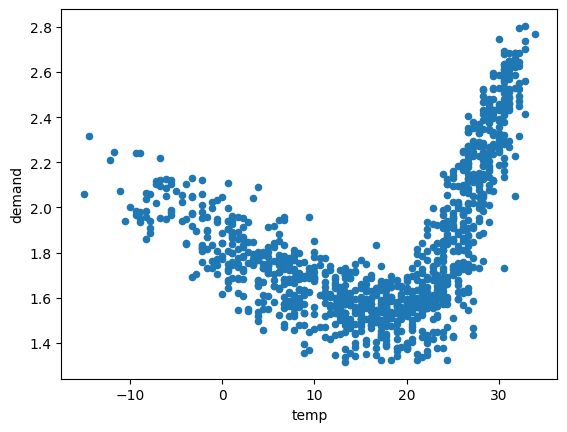

In [546]:
df.plot(x="temp",y="demand",kind="scatter")

### Divide the dataset in train and test splits

In [547]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.5,train_size=0.5)
print("X training set as has shape {}".format(X_train.shape))
print("y training set as has shape {}".format(y_test.shape))
print("X testing set as has shape {}".format(X_train.shape))
print("y testing set as has shape {}".format(y_test.shape))

X training set as has shape (548, 1)
y training set as has shape (548,)
X testing set as has shape (548, 1)
y testing set as has shape (548,)


### Create an evaluation function to compute, print and return the metrics: rmse r2 f-statistic and p-value

In [548]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm

def f_test(y_true, pred,n_var,n_obs):
    y_true=np.array(y_true)
    pred=np.array(pred)
    y_true_m= np.mean(y_true)
    SSE=np.sum((y_true  - pred)**2)
    SSM=np.sum((pred  - y_true_m)**2)
    SST=np.sum((y_true_m - pred)**2)
    MSM= SSM/n_var
    MSE=SSE/(n_obs - n_var + 1)
    MST=SST/n_obs - 1
    F=MSM/MSE
    p = 1- scipy.stats.f.cdf(F,DFM,DFE)
    return F, p

def print_eval(X, y, model):
    pred = model.predict(X)
    F, p = f_test(y, pred, X.shape[1], X.shape[0])
    print(" Mean squared error: \t{:.5}".format(mean_squared_error(y,pred)))
    print(" r2 score: \t\t{:.5}".format(r2_score(y,pred)))
    print(" f-statistic: \t\t{:.5}".format(F))
    print(" p-value: \t\t{:.5}".format(p))
    return mean_squared_error(pred, y), r2_score(pred, y), F, p




## First experiment
Create a linear model 

Train the model on X_train and y_train 

Evaluate the model on X_test and y_test


In [549]:
lr =LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)


#### Visualize the prediction of the model 

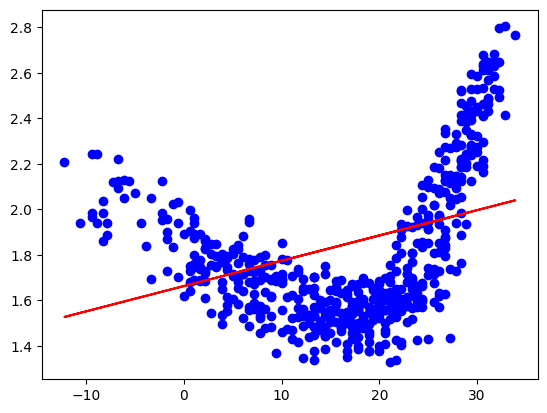

In [550]:
plt.scatter(X_test,y_test,color="blue")
plt.plot(X_test,y_pred, color="red")

## Second experiment - Polynomial regression
We can clearly see that the linear regression model cannot really approximate the data distribution.

We can now try with a non linear regression model:
1. Use the sklearn fucntion _PolynomialFeature_ to create a new array of features. Set _degree=2_ and _include_bias=False_
2. Train a Linear regression model with the new features
3. Evaluate the model 
4. Visualize the predicted values of the model

#### Polynomial degree = 2

In [551]:
pf=PolynomialFeatures(degree=6, include_bias=False)
X_train_pf=pd.DataFrame(pf.fit_transform(X_train))
X_test_pf=pd.DataFrame(pf.fit_transform(X_test))
display(X_train_pf.head())
display(X_train.head())

,0,1,2,3,4,5
0,30.6,936.36,28652.616,876770.0496,2.682916e+07,8.209724e+08
1,27.2,739.84,20123.648,547363.2256,1.488828e+07,4.049612e+08
2,11.1,123.21,1367.631,15180.7041,1.685058e+05,1.870415e+06
3,22.2,492.84,10941.048,242891.2656,5.392186e+06,1.197065e+08
4,26.1,681.21,17779.581,464047.0641,1.211163e+07,3.161135e+08


,temp
578,30.6
166,27.2
1043,11.1
967,22.2
546,26.1


In [552]:
lr.fit(X_train_pf,y_train)
y_pred=lr.predict(X_test_pf)

ValueError: x and y must have same first dimension, but have shapes (47, 1) and (548,)

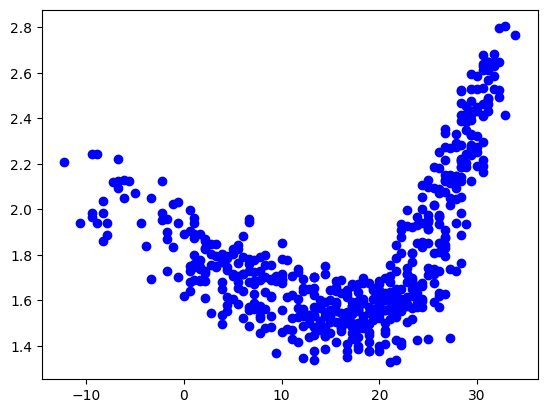

In [553]:
plt.scatter(X_test,y_test,color="blue")
plt.plot(X_test,y_pred, color="red")

## Third experiment

#### Polynomial degree = 3

/home/matteo/datamining/labs/env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


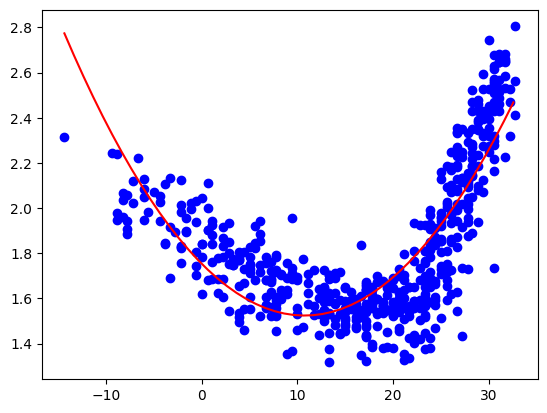

/home/matteo/datamining/labs/env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


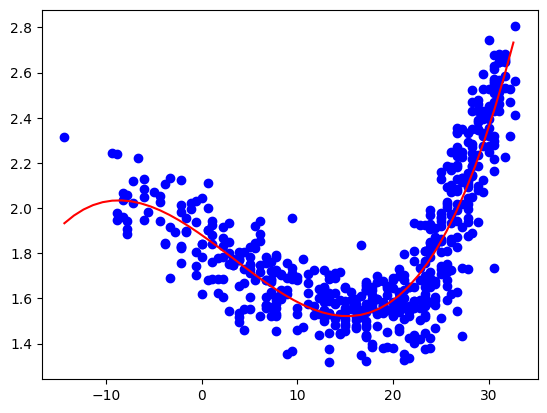

/home/matteo/datamining/labs/env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


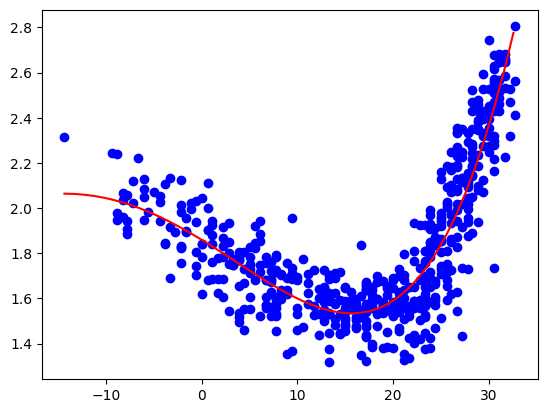

[]


In [ ]:
performance= []

for degree in range(2,5):
    pf=PolynomialFeatures(degree=degree, include_bias=False)
    X_train_pf=pd.DataFrame(pf.fit_transform(X_train))
    X_test_pf=pd.DataFrame(pf.fit_transform(X_test))
    lr.fit(X_train_pf,y_train)
    y_pred=lr.predict(pf.transform((np.arange(min(X_test.temp), max(X_test.temp))).reshape(-1,1)))
    #performance.append(print_eval(pf.transform((np.arange(min(X_test.temp), max(X_test.temp))).reshape(-1,1)),y_test,lr))
    plt.scatter(X_test,y_test,color="blue")
    plt.plot(np.arange(min(X_test.temp),max(X_test.temp)),y_pred, color="red")
    plt.show()
print(performance)

## Fourth experiment
### Polynomial degree = 4

## Compare the performance of the four models